# Preparations

In [1]:
# Env
from Env1_Two_Armed_Bandit import *
from Agent import *
env = Two_Armed_Bandit()

/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Save Paths
from datetime import datetime
path = "../Log/train_env1/" + datetime.now().strftime("%m%d-%H:%M:%S") + "_last_seen_1"

In [3]:
# Hyperparameters
gamma = 0.75  # Discount factor for past rewards
learning_rate = 7e-4

# Hyperparameters
beta_v = 0.05
beta_e = 0.05

# train
nb_trials = 100
nb_episodes = 15000
#nb_episodes = 20000

In [4]:
# Agent
agent = Agent(learning_rate, gamma, beta_v, beta_e,  #loss func
                 env, nb_trials, nb_episodes,  #train
                 path)

2023-01-11 14:56:32.821366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

In [5]:
agent.train()

In [6]:
# agent.model.save(path+'/model.h5')

# Testing

In [5]:
test_model = keras.models.load_model('../Log/train_env1/0111-14:00:46_last_seen_1/model.h5')
#test_model = agent.model
test_episode = 500

# Analysis

In [6]:
agent.env.held_out = False
agent.test(test_model, test_episode, 100)
cl,cr,rl,rr = agent.env.get_abcd()
y = np.log2(np.divide(cr, [x+1e-10 for x in cl])+1e-10)
x = np.log2(np.divide(rr, [x+1e-10 for x in rl])+1e-10)

In [7]:
agent.env.held_out = True
agent.test(test_model, test_episode, 100)
cl2,cr2,rl2,rr2 = agent.env.get_abcd()
x2 = np.log2(np.divide(cr2, [x+1e-10 for x in cl2])+1e-10)
y2 = np.log2(np.divide(rr2, [x+1e-10 for x in rl2])+1e-10)

In [8]:
import matplotlib.pyplot as plt

def plotfigure1(x,y):
    # Make sure that x and y have the same length
    assert len(x) == len(y)
    # Create a figure and an axis
    fig, ax = plt.subplots()
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    # Plot x and y
    ax.scatter(x, y)
    # Add axis labels and a title
    ax.set_xlabel('log2(RR/RL)')
    ax.set_ylabel('log2(CR/CL)')
    ax.set_title('Plot of x and y')
    # Show the plot
    plt.show()

In [9]:
def plotfigure2(x,y,x2,y2):
    # Make sure that x and y have the same length
    assert len(x) == len(y)
    
    a, b = np.polyfit(x, y, 1)
    a2, b2 = np.polyfit(x2, y2, 1)
    
    # Create a figure and an axis
    fig, ax = plt.subplots()
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    # Plot x and y
    ax.scatter(x, y, s=2)
    # ax.plot(x, a*x+b)
    
    ax.scatter(x2, y2, s=2)
    # ax.plot(x2, a2*x2+b2)
    # Add axis labels and a title
    ax.set_xlabel('log2(RR/RL)')
    ax.set_ylabel('log2(CR/CL)')
    ax.set_title('Plot of x and y')
    # Show the plot
    plt.show()

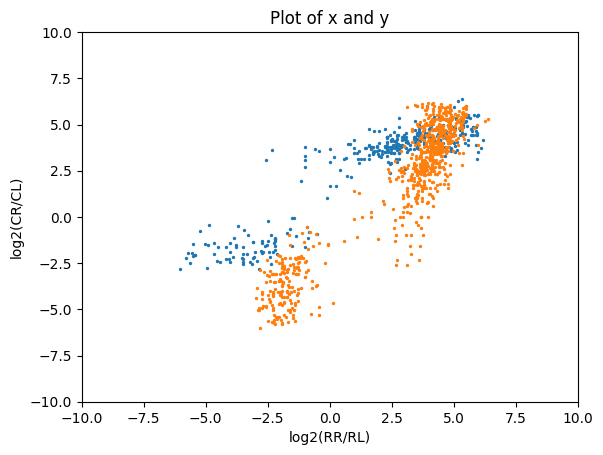

In [10]:
#plotfigure1(x,y)
# plotfigure1(x2,y2)
plotfigure2(x,y,x2,y2)